In [1]:
datafolder = "24-04-24"

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
for dirname, _, filenames in os.walk('data/24-04-24'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/24-04-24/Zeitposten.csv
data/24-04-24/Ressource.csv
data/24-04-24/Einsatzstelle.csv
data/24-04-24/Reklamationen.csv
data/24-04-24/Tour.csv
data/24-04-24/Auftr„ge.csv


In [4]:
def load_and_preview_dataset(name, data_folder, filename, sep=','): 
    df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)
    print(f'Columns and data types of "{name}" dataset')
    display(df.dtypes)
    print(f'Number of rows of "{name}" dataset', len(df))
    print(f'Head of {name} dataset')
    display(df.head())
    print("\nMissing values in orders:\n", df.isnull().sum())
    return df

### tours

In [5]:
tours = load_and_preview_dataset('tours', datafolder, 'Tour.csv')

Columns and data types of "tours" dataset


%TOURNR            int64
Einsatzdatum      object
Betriebsstätte    object
%Rahmentour        int64
Rahmentourcode    object
dtype: object

Number of rows of "tours" dataset 138953
Head of tours dataset


,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335



Missing values in orders:
 %TOURNR           0
Einsatzdatum      0
Betriebsstätte    1
%Rahmentour       0
Rahmentourcode    0
dtype: int64


In [6]:
tours = tours.rename(columns={
    '%TOURNR': 'tour_number',
    'Einsatzdatum': 'service_date',
    'Betriebsstätte': 'operational_site',
    '%Rahmentour': 'reference_tour_number',
    'Rahmentourcode': 'reference_tour_code'
})
display(tours.head())

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


### how many actual 'routes' do we have

In [34]:
print(f'the number of distinct tours is: {len(tours.reference_tour_code.unique())}')

the number of distinct tours is: 199


### lets have a look at the operational sites
does an operational site always have the same reference_tour_numb er and reference_tour_code

In [8]:
tours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   tour_number            138953 non-null  int64 
 1   service_date           138953 non-null  object
 2   operational_site       138952 non-null  object
 3   reference_tour_number  138953 non-null  int64 
 4   reference_tour_code    138953 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.3+ MB


In [7]:
tours.operational_site.value_counts()

operational_site
MONU    138952
Name: count, dtype: int64

In [24]:
tours.reference_tour_number.value_counts()

reference_tour_number
136    3390
126    2893
51     2722
27     2708
124    2665
       ... 
191       1
193       1
192       1
190       1
199       1
Name: count, Length: 199, dtype: int64

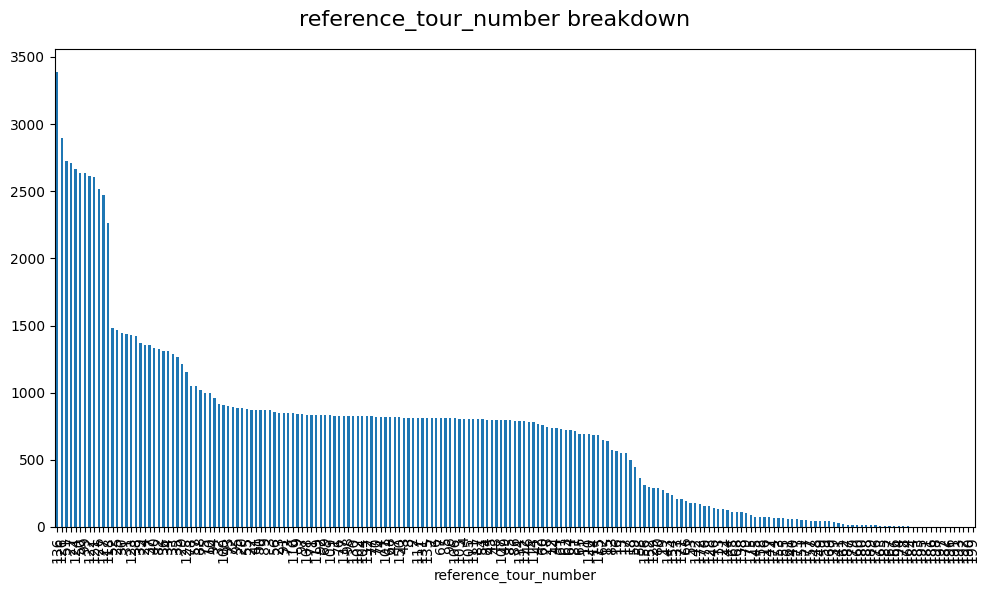

In [13]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('reference_tour_number breakdown', fontsize=16)
tours.reference_tour_number.value_counts().plot(kind='bar', rot=90)
plt.tight_layout()

plt.show()

Reference Tour numbers have a real spread.  
Ranging from 3500 occurrences to 1
lets do the same for the reference tour code to see how that looks

In [23]:
tours.reference_tour_code.value_counts()

reference_tour_code
TCT0011       3390
TCT0008       2893
TGIGLU0712    2722
TCT0014       2708
TCT0005       2665
              ... 
TP00105          1
TP00106          1
TP00103          1
TP00104          1
TM00669          1
Name: count, Length: 199, dtype: int64

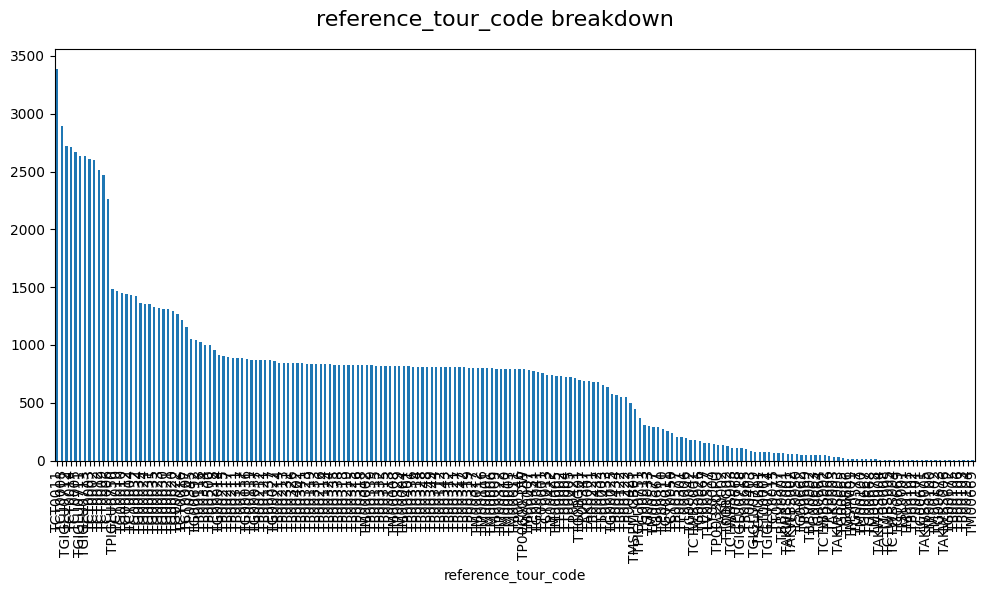

In [14]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('reference_tour_code breakdown', fontsize=16)
tours.reference_tour_code.value_counts().plot(kind='bar', rot=90)
plt.tight_layout()

plt.show()

In [26]:
is_same = np.array_equal(tours.reference_tour_number.value_counts().values, tours.reference_tour_code.value_counts().values)

print(is_same)

True


tours.reference_tour_number and reference_tour_code are essentially the same data. just encoded differently

I want to join the reklamtion table to the Tour table
Reklmation foreign key is % TOURNR

In [27]:
reklmationen = load_and_preview_dataset('reklmationen', datafolder, 'Reklamationen.csv')

Columns and data types of "reklmationen" dataset


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_9394/1101745544.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{data_folder}/{filename}', sep=sep)


%TOURNR                                 int64
Belegnr.                               object
Reklamationsgrund                       int64
Grund                                  object
Reklamationsuntergrund Beschreibung    object
dtype: object

Number of rows of "reklmationen" dataset 790425
Head of reklmationen dataset


,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
0,160016,A241067066,402,BB Deckel beschädigt,großer Deckel - Hauptdeckel
1,122761,A240871203,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
2,97644,A240929593,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
3,121874,A240803399,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
4,122263,A240977660,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)



Missing values in orders:
 %TOURNR                                     0
Belegnr.                                    0
Reklamationsgrund                           0
Grund                                      24
Reklamationsuntergrund Beschreibung    557898
dtype: int64


In [29]:
tours_reklmation = tours.merge(reklmationen, left_on='tour_number', right_on='%TOURNR', how='left')

In [36]:
print(f'how many actual complaint reasons do we have: {len(tours_reklmation.Grund.unique())}')

how many actual complaint reasons do we have: 70


Thats a lot fewer reasons that I expected

In [41]:
display(pd.DataFrame(tours_reklmation.Grund.unique()))

,0
0,BB Rad beschädigt
1,VSS Schlüssel/Code erforderlich
2,VST Tresorproblem
3,TV Transportweg versperrt
4,Behälter in Schüttung gefallen
5,Behälter fehlt
6,RC Behälter vermüllt
7,NaN
8,NB nicht bereitgestellter Behälter
9,Behälter zu schwer


23	Fahrzeugausfall/Fahrzeugwechsel
24	Tour nicht geschafft

seem the most likely. lets see how many we have

In [43]:
tour_nicht_geschafft = tours_reklmation[tours_reklmation.Grund == 'Tour nicht geschafft']

In [44]:
display(tour_nicht_geschafft.head())

,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
506,47060,29.09.2021,MONU,1,TP00335,47060.0,A213386316,901.0,Tour nicht geschafft,NaN
507,47060,29.09.2021,MONU,1,TP00335,47060.0,A213401251,901.0,Tour nicht geschafft,NaN
509,47060,29.09.2021,MONU,1,TP00335,47060.0,A213364845,901.0,Tour nicht geschafft,NaN
510,47060,29.09.2021,MONU,1,TP00335,47060.0,A213375624,901.0,Tour nicht geschafft,NaN
511,47060,29.09.2021,MONU,1,TP00335,47060.0,A213387375,901.0,Tour nicht geschafft,NaN
